In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Customer Churn Analysis.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There 3 columns, SeniorCitizen,tenure,MonthlyCharges which are the numerical values and other columns are categorical values.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


These are the statistical values of the dataset

# EDA

Univariate analysis

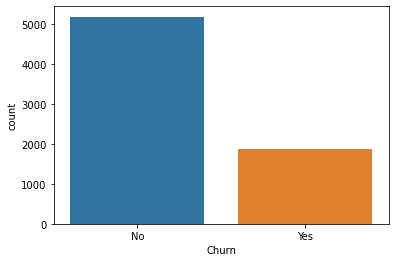

In [7]:
sn.countplot(df['Churn']);

From this we can see that Churn is imbalanced

In [57]:
import sklearn
sklearn.__version__

'0.24.1'

In [58]:
import numpy
numpy.__version__

'1.20.1'

In [59]:
from imblearn.over_sampling import SMOTE

To make the balaced data of quality we are using SMOTE

In [61]:
x=x=df.drop(["Churn"],axis=1)
y=df['Churn']

In [62]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [63]:
trainy.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Churn got balanced

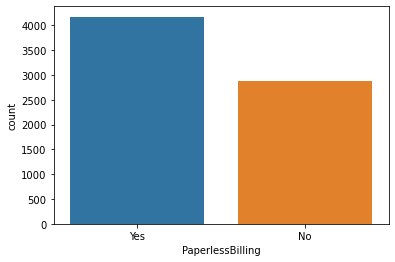

In [8]:
sn.countplot(df['PaperlessBilling']);

there is imbalce exist in PagerlessBilling

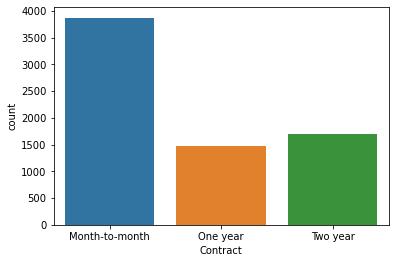

In [9]:
sn.countplot(df['Contract']);

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

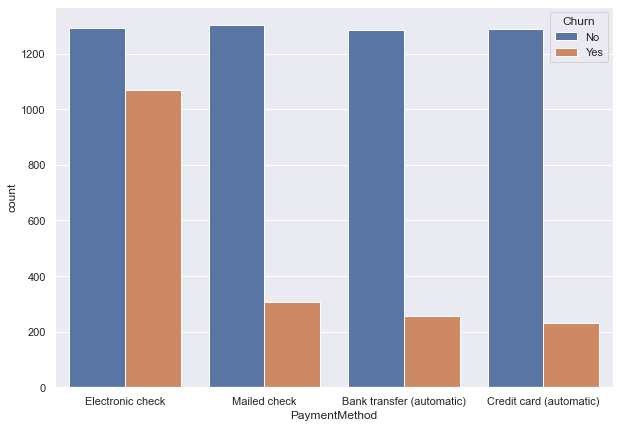

In [11]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='PaymentMethod',hue='Churn',data= df )

Here We can notice Churn rate is very high in those are having Electronic check of payment method and Its almost equal in other PaymentMethods

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

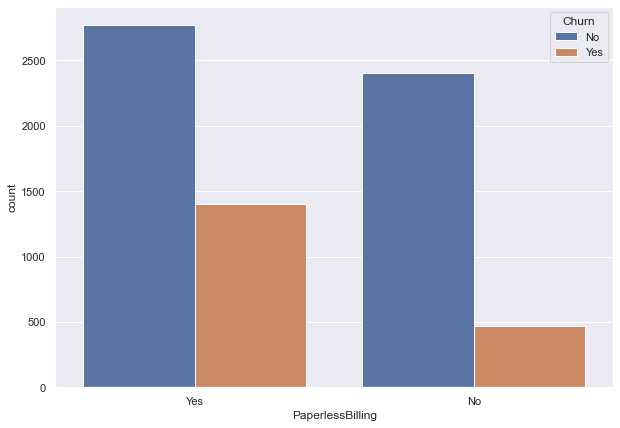

In [13]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='PaperlessBilling',hue='Churn',data= df )

We can see here the  Churn rate is high 

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

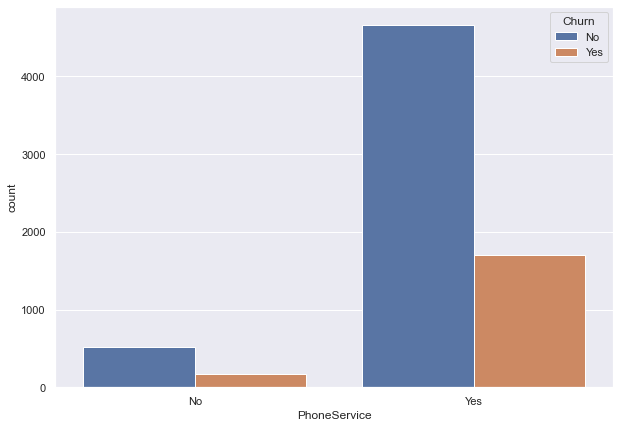

In [15]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='PhoneService',hue='Churn',data= df )

most the cx having PhoneService, few of them not having PhoneService. Churn is also high in cx having PhoneService

<AxesSubplot:xlabel='tenure', ylabel='count'>

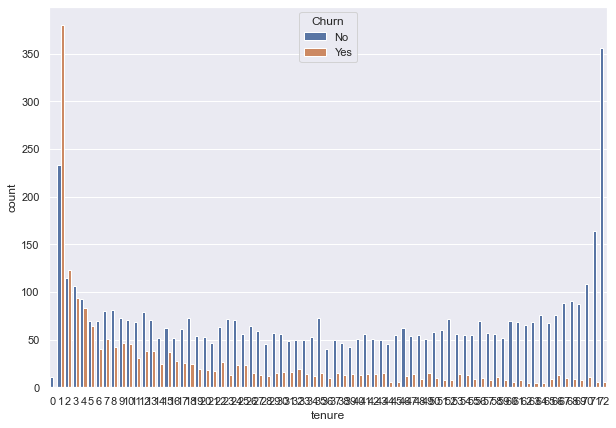

In [16]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='tenure',hue='Churn',data= df )

Churn is high where tenure is less

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

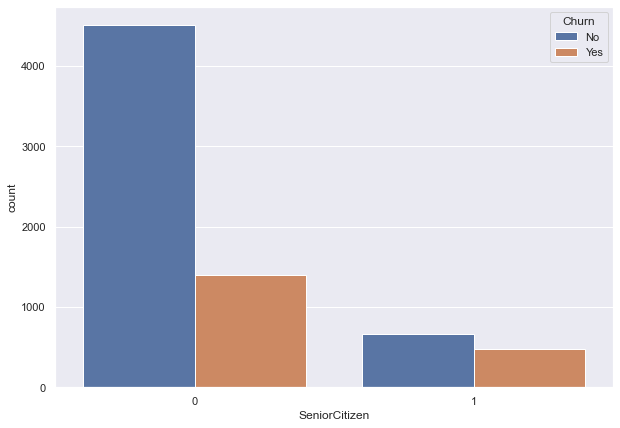

In [17]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='SeniorCitizen',hue='Churn',data= df )

Churn is less in SeniorCitizen

<AxesSubplot:xlabel='gender', ylabel='count'>

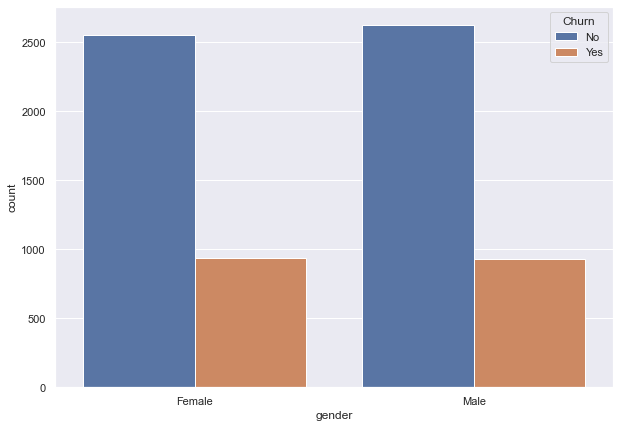

In [18]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='gender',hue='Churn',data= df )

Churn is almost same in all the gender

# Bivariate analysis

<AxesSubplot:title={'center':'comparison between gender and Churn'}, xlabel='gender', ylabel='Churn'>

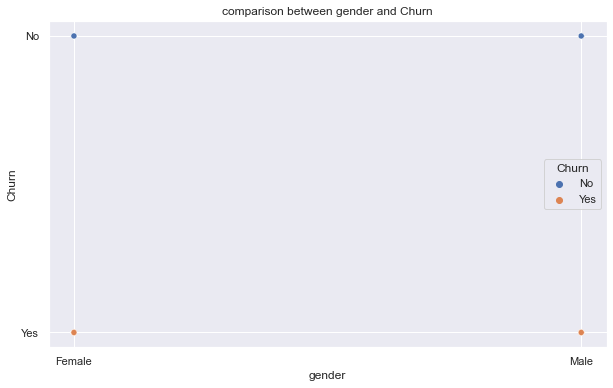

In [19]:
plt.figure(figsize=[10,6])
plt.title("comparison between gender and Churn")
sn.scatterplot(df['gender'],df['Churn'],hue=df["Churn"])

<AxesSubplot:title={'center':'comparison between SeniorCitizen and Churn'}, xlabel='SeniorCitizen', ylabel='Churn'>

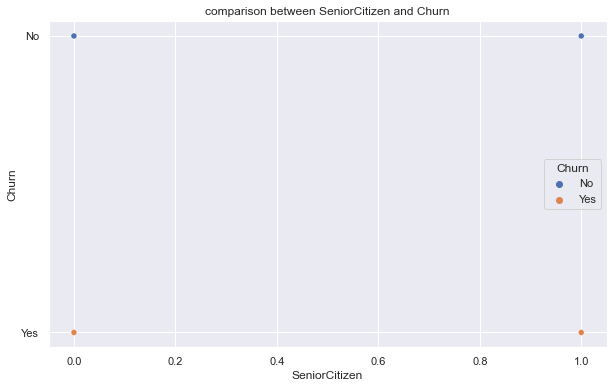

In [20]:
plt.figure(figsize=[10,6])
plt.title("comparison between SeniorCitizen and Churn")
sn.scatterplot(df['SeniorCitizen'],df['Churn'],hue=df["Churn"])

<AxesSubplot:title={'center':'comparison between PaperlessBilling and Churn'}, xlabel='PaperlessBilling', ylabel='Churn'>

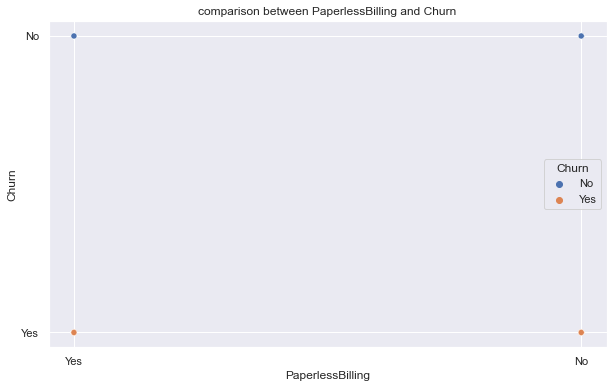

In [21]:
plt.figure(figsize=[10,6])
plt.title("comparison between PaperlessBilling and Churn")
sn.scatterplot(df['PaperlessBilling'],df['Churn'],hue=df["Churn"])

<AxesSubplot:title={'center':'comparison between tenure and Churn'}, xlabel='tenure', ylabel='Churn'>

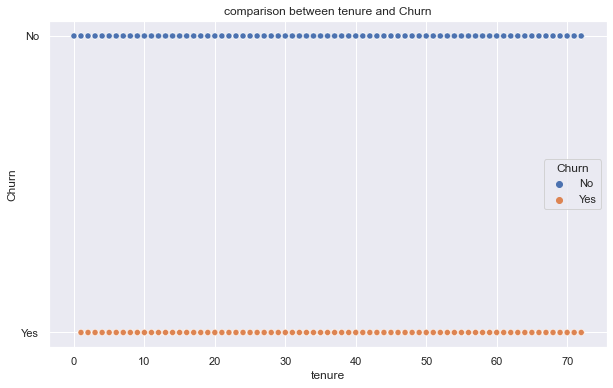

In [22]:
plt.figure(figsize=[10,6])
plt.title("comparison between tenure and Churn")
sn.scatterplot(df['tenure'],df['Churn'],hue=df["Churn"])

In [ ]:
plt.figure(figsize=[10,6])
plt.title("comparison between PaymentMethod and Churn")
sn.scatterplot(df['PaymentMethod'],df['Churn'],hue=df["Churn"])

<AxesSubplot:title={'center':'comparison between Contract and Churn'}, xlabel='Contract', ylabel='Churn'>

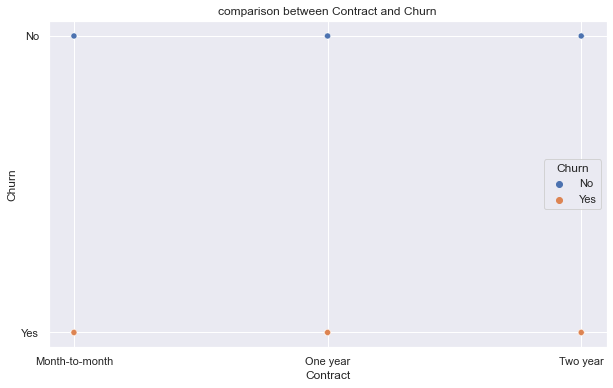

In [23]:
plt.figure(figsize=[10,6])
plt.title("comparison between Contract and Churn")
sn.scatterplot(df['Contract'],df['Churn'],hue=df["Churn"])

These are the coorelation of the data

# Converting string data into numerical data by using LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [27]:
df['TotalCharges']=le.fit_transform(df['TotalCharges'])

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

Encoded object columns into Numeric values

In [30]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

All the columns changed to numerical values

In [31]:
df.shape

(7043, 21)

In [32]:
cor=df.corr()
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


In [ ]:
These are the correlation value of the dataset

<AxesSubplot:>

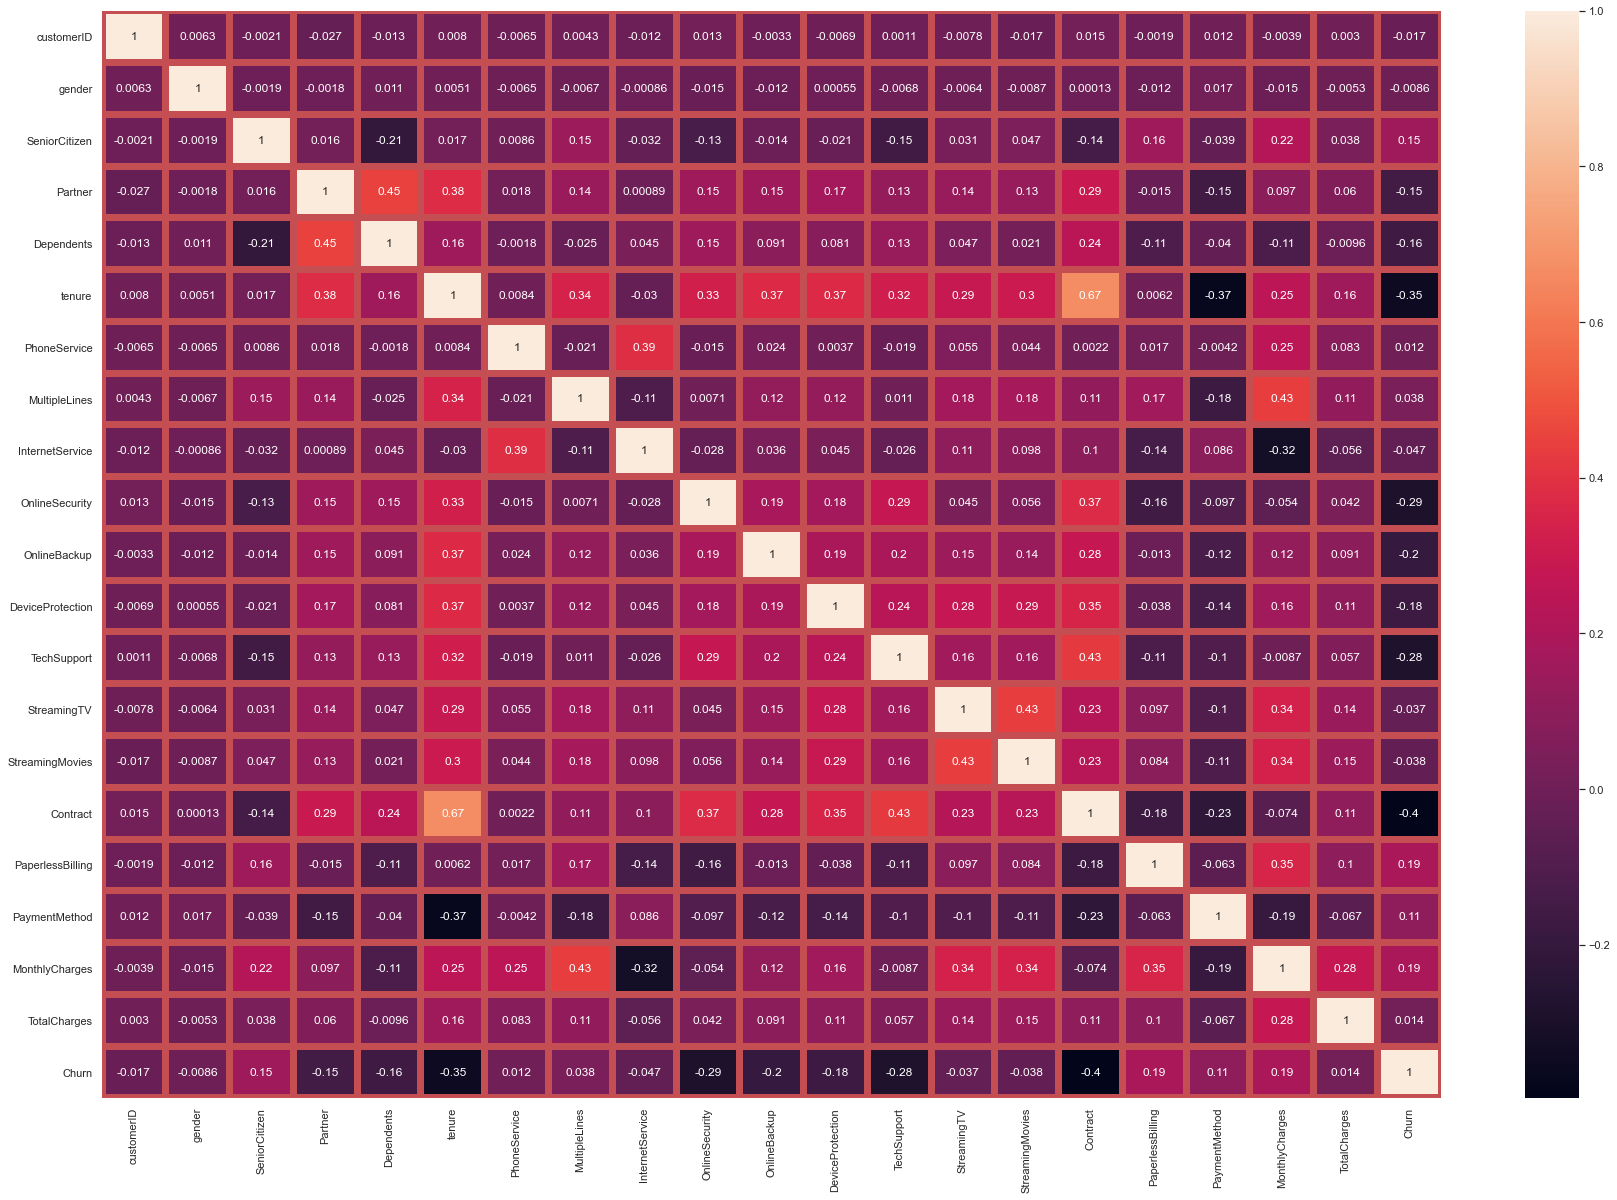

In [33]:
plt.figure(figsize=[30,20])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

There are columns like tenure, OnlineSecurity,TechSupport and Contract negatively correlated wiht target

customerID             AxesSubplot(0.125,0.536818;0.0596154x0.343182)
gender              AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
SeniorCitizen       AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Partner             AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Dependents          AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
tenure              AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
PhoneService        AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
MultipleLines       AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
InternetService     AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
OnlineSecurity      AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
OnlineBackup        AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
DeviceProtection          AxesSubplot(0.125,0.125;0.0596154x0.343182)
TechSupport            AxesSubplot(0.196538,0.125;0.0596154x0.343182)
StreamingTV            AxesSubplot(0.268077,0.125;0.0596154x0.343182)
StreamingMovies     

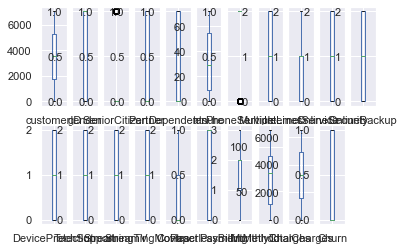

In [37]:
df.plot(kind="box",subplots=True,layout=(2,11))

There are outliers present in 2 columns

# Outlier Remover

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

# skewness

In [40]:
df1.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

There are skewness present in SeniorCitizen we are not handling the skewness in the target

In [41]:
from sklearn.preprocessing import power_transform

In [43]:
df1[['SeniorCitizen']]=power_transform(df1[['SeniorCitizen']])

In [46]:
df1.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

# Dividing Data into x and y

In [47]:
x=df.drop(["Churn"],axis=1)
y=df['Churn']

In [48]:
x.shape

(7043, 20)

In [49]:
y.shape

(7043,)

# scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

# Splitting the Data for Training and Testing

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# Find the best random states use here

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=12)

creating the train test split

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7501774308019872
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1043
           1       0.52      0.54      0.53       366

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409



By using DecisionTreeClassifier. Got the accuracy as 75%

In [66]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8005677785663591
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1043
           1       0.66      0.47      0.55       366

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



By using SVC. Got the accuracy as 80%

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.7501774308019872
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1043
           1       0.52      0.45      0.48       366

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409



By using SVC. Got the accuracy as 75%

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [69]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7984386089425124
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1043
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



By using RandomForestClassifier. Got the accuracy as 80%

# Cross validation Score

In [70]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7262523993483451


In [71]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7346301575908123


In [73]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6836552963094393


In [74]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7948326303309892


# Ensemble Techniques

# ADA BOOST CLASSIFIER

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
adb=AdaBoostClassifier()

In [77]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7998580553584103
[[931 112]
 [170 196]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1043
           1       0.64      0.54      0.58       366

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Training accuracy:: 0.8036918707845225
Test accuracy:: 0.7998580553584103


Got the accuracy as 80%

# BAGGING CLASSIFIER

In [78]:
bgc=BaggingClassifier()

In [79]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7863733144073811
[[937 106]
 [195 171]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1043
           1       0.62      0.47      0.53       366

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Training accuracy:: 0.9818956336528222
Test accuracy:: 0.7863733144073811


Got the accuracy as 79%

# Gradient Boosting classifier

In [80]:
grbc=GradientBoostingClassifier()

In [81]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8147622427253371
[[951  92]
 [169 197]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1043
           1       0.68      0.54      0.60       366

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Training accuracy:: 0.8292509762158324
Test accuracy:: 0.8147622427253371


Got the accuracy as 82%

# cross validation score

In [83]:
print(cross_val_score(adb,x,y,cv=5).mean())

0.8003697819214143


In [84]:
print(cross_val_score(bgc,x,y,cv=5).mean())

0.7770845094844829


In [86]:
print(cross_val_score(grbc,x,y,cv=5).mean())

0.8009376613007291


We take ADA BOOST CLASSIFIER for HYPER PARAMETER TUNNING as its having train and test accuracy is closer.

# Hyper parameter tunning

In [87]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [89]:
parameter={'algorithm' : ['SAMME.R'],
            'n_estimators':[50,200],
            'learning_rate':[0.1,0.5],
            'random_state':[10]              
            }

In [90]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [0.1, 0.5],
                         'n_estimators': [50, 200], 'random_state': [10]})

In [92]:
GCV.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 10}

These are the best parameters

In [94]:
final_model=AdaBoostClassifier(algorithm= 'SAMME.R',learning_rate=0.1,n_estimators=200,random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print (accuracy*100)

80.97941802696948


Got the accuracy as 81%

# Ploltting AOC RUC CURVE

In [95]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score   

In [96]:
y_pred_prob=adb.predict_proba(x_test)[:,1]

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=1) 

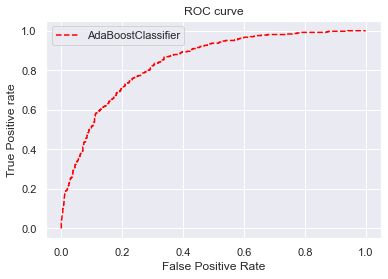

In [98]:
sn.set_theme(style="darkgrid")
plt.plot(fpr, tpr, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Got the ROC CURVE

# Saving the model

In [99]:
import joblib
joblib.dump(final_model,"Final Model of Customer Churn Analysis.pkl")

['Final Model of Customer Churn Analysis.pkl']

Saved the model